# Get Sub count for each Subreddit

In [1]:
import praw
import pandas as pd

In [2]:
subReddits = ["pakistan", "islamabad", "lahore", "karachi", "technology", "tech", "technews", "news","worldnews", "sports", "youtube", "television", "relationship_advice", "relationships", "AskReddit", "ask", "Discussion", "Filmmakers", "filmmaking", "Movies","MovieSuggestions", "FASTNU", "NUST", "LinusTechTips", "religion", "Catholicism","islam", "progressive_islam", "Judaism", "Buddhism", "hinduism", "Freethought", "exmuslim",
              "exmormon", "skeptic", "Music", "todayilearned", "science", "showerthoughts", "space", "askscience", "mildlyinteresting", "explainlikeimfive", "LifeProTips", "GetMotivated", "Gadgets", "dataisbeautiful", "futurology", "Documentaries", "UpliftingNews", "personalfinance", "tifu", "philosophy", "history", "Damnthatsinteresting", "wallstreetbets", "NatureIsFuckingLit", "creepy", "InternetIsBeautiful", "lifehacks", "nba", "Fitness", "interestingasfuck", "travel", "nfl", "AdviceAnimals", "CryptoCurrency","politics", "NetflixBestOf", "mildlyinfuriating", "soccer", "Parenting", "europe", "buildapc", "gardening","Bitcoin", "cars", "programming", "apple", "YouShouldKnow", "nevertellmetheodds", "frugal", "coolguides", "socialskills", "foodhacks", "nasa", "nutrition", "NoStupidQuestions", "Economics", "TravelHacks", "biology", "dating_advice", "Survival", "unpopularopinion", "formula1", "PremierLeague", "bodyweightfitness", "MovieDetails", "learnprogramming", "Cooking", "iphone", "hardware", "Entrepreneur", "unitedkingdom", "careerguidance", "homeautomation", "changemyview", "psychology", "running", "compsci", "motorcycles", "math", "HealthyFood", "chemistry", "Baking", "StockMarket", "oddlyspecific", "JapanTravel", "bodybuilding", "Astronomy", "writing", "Health", "Atheism", "travelpartners"]

In [3]:
len(subReddits)

124

In [4]:
reddit = praw.Reddit(
            client_id='P4-FFLW065bTLnGSqfCnlg',
            client_secret='-EBrPckd7kwt0b8OaxJ-5cfwYRExQw',
            user_agent='MyRedditScraper/1.0 (Macintosh; Intel Mac OS X 14.3.1; Apple Silicon) Python/3.12 (fasihrem@gmail.com)'
        )

print(reddit.read_only)

True


In [18]:
srs = {}
for subreddits in subReddits:
    subs = reddit.subreddit(subreddits).subscribers
    print(f"r/{subreddits} has {subs} subscribers")
    
    if subreddits in srs:
        srs[subreddits].append(subs)
    else:
        srs[subreddits] = [subs]


r/pakistan has 295034 subscribers
r/islamabad has 103861 subscribers
r/lahore has 99509 subscribers
r/karachi has 63748 subscribers
r/technology has 17200548 subscribers
r/tech has 651583 subscribers
r/technews has 886447 subscribers
r/news has 28691376 subscribers
r/worldnews has 40918537 subscribers
r/sports has 21291060 subscribers
r/youtube has 2369521 subscribers
r/television has 17311024 subscribers
r/relationship_advice has 13966948 subscribers
r/relationships has 3530522 subscribers
r/AskReddit has 48517348 subscribers
r/ask has 1033167 subscribers
r/Discussion has 26754 subscribers
r/Filmmakers has 2830035 subscribers
r/filmmaking has 22419 subscribers
r/Movies has 33683919 subscribers
r/MovieSuggestions has 1556403 subscribers
r/FASTNU has 4961 subscribers
r/NUST has 15659 subscribers
r/LinusTechTips has 401346 subscribers
r/religion has 110656 subscribers
r/Catholicism has 227581 subscribers
r/islam has 315929 subscribers
r/progressive_islam has 38056 subscribers
r/Judaism h

In [22]:
srs_df = pd.DataFrame(list(srs.items()), columns=['Subreddit', 'Subscribers'])
srs_df['Subscribers'] = srs_df['Subscribers'].apply(lambda x: x[0] if isinstance(x, list) else x)
print(srs_df.head())


    Subreddit  Subscribers
0    pakistan       295034
1   islamabad       103861
2      lahore        99509
3     karachi        63748
4  technology     17200548


In [23]:
srs_df.to_csv("subscribers_count.csv")

# Normalise Subscribers and Upvotes 

In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv("subscribers_count.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Subreddit,Subscribers
0,pakistan,295034
1,islamabad,103861
2,lahore,99509
3,karachi,63748
4,technology,17200548


In [3]:
import os
import pandas as pd

directory = "/home/fasih/FYP/data-tails/Backend/data/uni_pc/"
files = os.listdir(directory)

srs = df['Subreddit'].tolist()
max_subscribers = df['Subscribers'].max()
min_subscribers = df['Subscribers'].min()

# Initialize a list with None values
avg_upvotes = [None] * len(df)

for file in files:
    subreddit_name = file.split('_')[0]
    
    if subreddit_name in srs:
        file_path = os.path.join(directory, file)
        temp_df = pd.read_csv(file_path)
        
        if 'noOfUpvotes' in temp_df.columns:
            # Calculate the average upvotes
            avg = temp_df['noOfUpvotes'].mean()
            
            # Find the index in df to update
            idx = df.index[df['Subreddit'] == subreddit_name].tolist()
            if idx:  # Check if the subreddit exists in df
                avg_upvotes[idx[0]] = avg  # Update the first occurrence
            
# Assign the computed averages to the DataFrame
df['Avg_Upvotes'] = avg_upvotes

# Now you can calculate max and min upvotes
max_upvotes = df['Avg_Upvotes'].max()
min_upvotes = df['Avg_Upvotes'].min()


In [4]:
df.head(10)

,Subreddit,Subscribers,Avg_Upvotes
0,pakistan,295034,682.908726
1,islamabad,103861,20.336488
2,lahore,99509,13.495726
3,karachi,63748,18.832402
4,technology,17200548,1682.754286
5,tech,651583,5353.941810
6,technews,886447,411.372236
7,news,28691376,87976.984940
8,worldnews,40918537,1744.348534
9,sports,21291060,1883.775510


In [5]:
df['Normalized Upvotes'] = (df['Avg_Upvotes'] - min_upvotes) / (max_upvotes - min_upvotes)
df['Normalized Subs'] = (df['Subscribers'] - min_subscribers) / (max_subscribers - min_subscribers)

print(df.head(5))

    Subreddit  Subscribers  Avg_Upvotes  Normalized Upvotes  Normalized Subs
0    pakistan       295034   682.908726            0.007663         0.005979
1   islamabad       103861    20.336488            0.000206         0.002039
2      lahore        99509    13.495726            0.000129         0.001949
3     karachi        63748    18.832402            0.000189         0.001212
4  technology     17200548  1682.754286            0.018915         0.354458


# Calculating Score for each Subreddit using Weighted Scoring method

In [6]:
w1 = 0.2
w2 = 0.8
df['Scores'] = (w1 * df['Normalized Subs']) + (w2 * df['Normalized Upvotes'])

print(df.head(5))

    Subreddit  Subscribers  Avg_Upvotes  Normalized Upvotes  Normalized Subs  \
0    pakistan       295034   682.908726            0.007663         0.005979   
1   islamabad       103861    20.336488            0.000206         0.002039   
2      lahore        99509    13.495726            0.000129         0.001949   
3     karachi        63748    18.832402            0.000189         0.001212   
4  technology     17200548  1682.754286            0.018915         0.354458   

     Scores  
0  0.007326  
1  0.000573  
2  0.000493  
3  0.000394  
4  0.086023  


In [7]:
print(df['Scores'].max())
print(df['Scores'].min())

0.9564258382091155
6.982673858678631e-05


In [8]:
df.to_csv("subreddit_scores.csv", sep=',', encoding='utf-8')

# Making a Visualisation of the Scores for each Subreddit

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

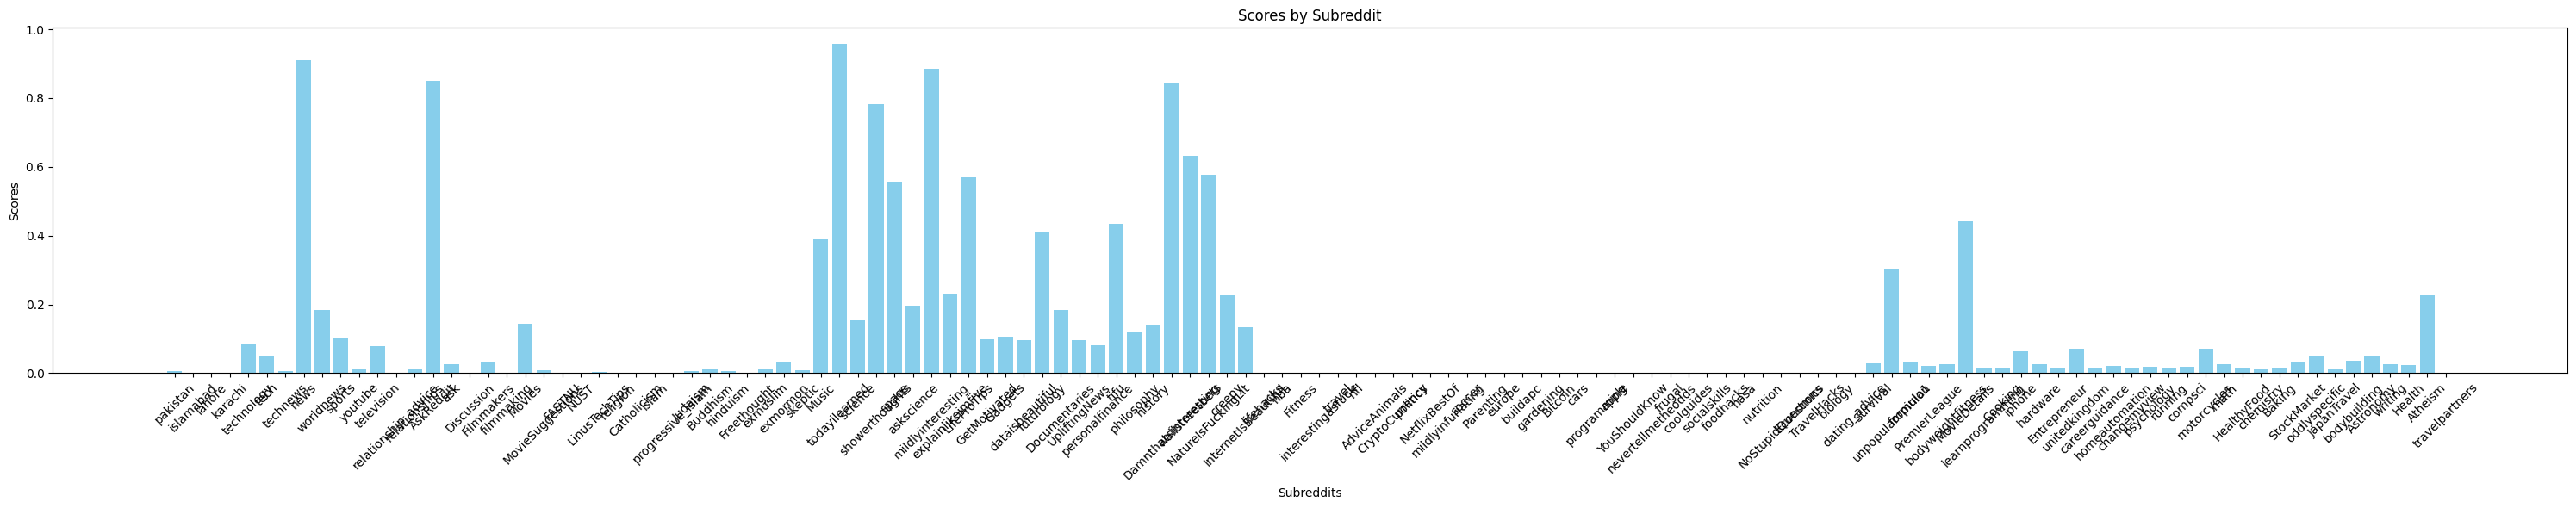

In [10]:
plt.figure(figsize=(30, 6))  # Set the figure size
plt.bar(df['Subreddit'], df['Scores'], color='skyblue')  # Create the bar chart

plt.title('Scores by Subreddit')  # Title of the chart
plt.xlabel('Subreddits')  # X-axis label
plt.ylabel('Scores')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

plt.savefig('/home/fasih/FYP/data-tails/Backend/data/bar_chart.png', format='png', dpi=300)  # dpi controls the resolution
plt.close()

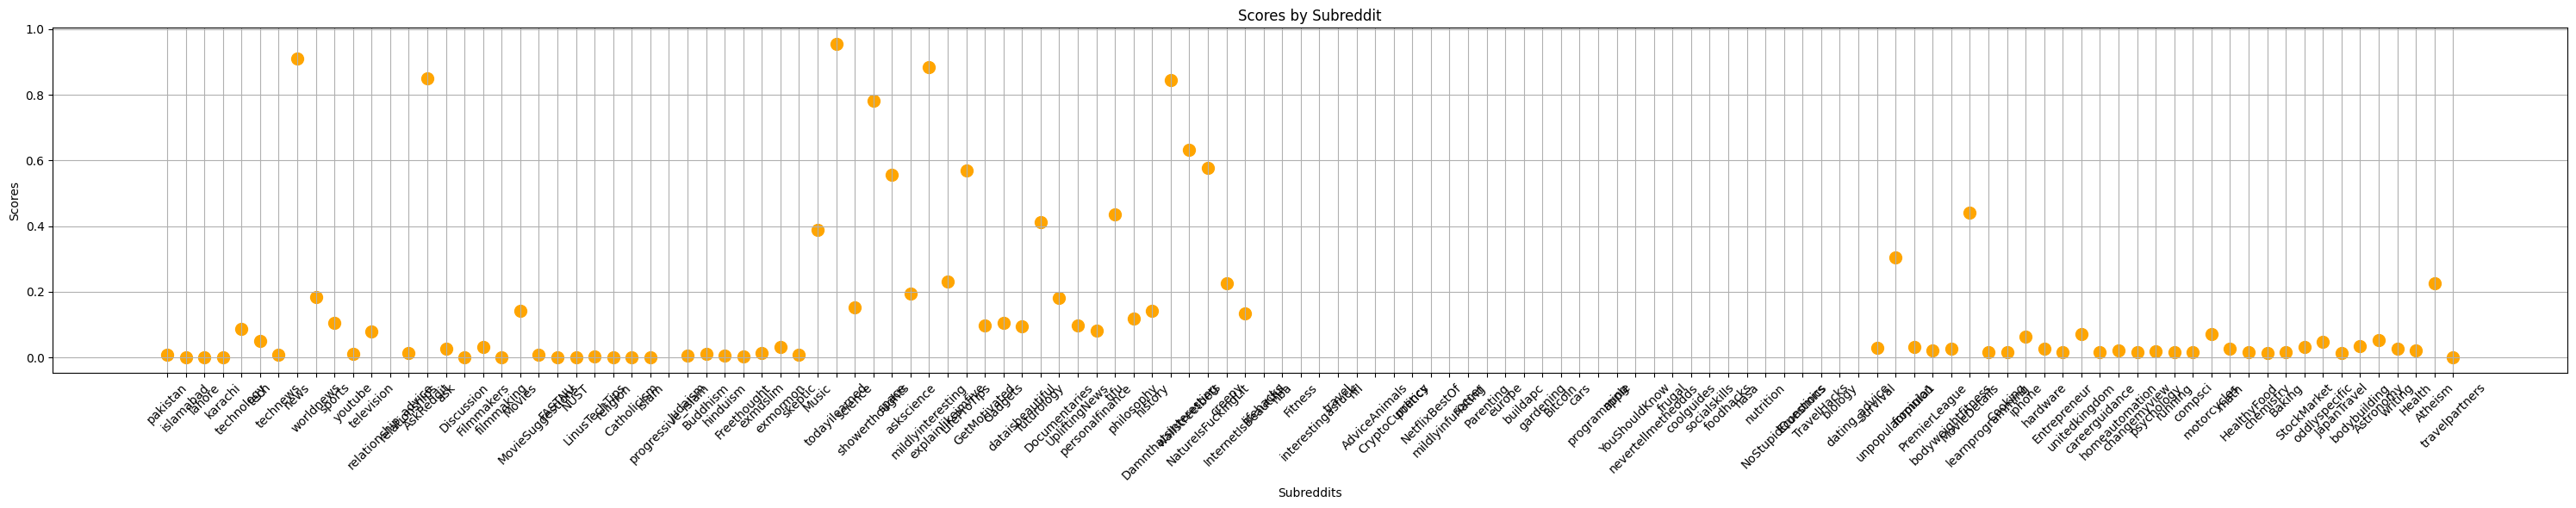

In [11]:
plt.figure(figsize=(30, 6))  # Set the figure size

    # Create scatter plot
plt.scatter(df['Subreddit'], df['Scores'], color='orange', s=100)  # s controls the size of the points

plt.title('Scores by Subreddit')  # Title of the chart
plt.xlabel('Subreddits')  # X-axis label
plt.ylabel('Scores')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated labels

plt.grid(True)  # Add grid for better readability
plt.show()  # Display the chart

plt.savefig('/home/fasih/FYP/data-tails/Backend/data/scatter_plot.png', format='png', dpi=300)  # dpi controls the resolution
plt.close()

In [26]:
import matplotlib
matplotlib.use('Agg')

In [28]:
# plt.figure(figsize=(8, 6))  # Set the figure size

#     # Create the box plot
# plt.boxplot(df['Scores'], patch_artist=True)

#     # Set title and labels
# plt.title('Box Plot of Scores')
# plt.ylabel('Scores')

# plt.xticks([1], ['Scores'])  # Set x-axis tick label

# plt.grid(axis='y')  # Add grid lines for better readability
# plt.savefig('box_plot.png')  # Save the plot as a PNG file
# print("Plot saved as 'box_plot.png'")

# # plt.savefig('/home/fasih/FYP/data-tails/Backend/data/box_plot.png', format='png', dpi=300)  # dpi controls the resolution
# plt.close()

Plot saved as 'box_plot.png'


In [33]:
score_counts = df['Scores'].value_counts().sort_index()

plt.figure(figsize=(30, 6))  # Set the figure size

# Create a bar plot for the long-tail distribution
plt.bar(score_counts.index, score_counts.values, color='lightblue', alpha=0.7)

    # Set title and labels
plt.title('Long-Tail Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

plt.xticks(score_counts.index)  # Set x-axis tick labels to the score values
plt.grid(axis='y')  # Add grid lines for better readability
plt.yscale('log')  # Use a logarithmic scale for better visualization of the long tail
plt.show()  # Display the plot

plt.savefig('/home/fasih/FYP/data-tails/Backend/data/longtail.png', format='png', dpi=300)  # dpi controls the resolution
plt.close()

/tmp/ipykernel_8470/1107945206.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()  # Display the plot


In [ ]:
subs = df['Subscribers'].tolist()

In [ ]:
sorted_df = df.sort_values(by='Subscribers', ascending=False)

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Subreddit', y='Subscribers', data=sorted_df, marker='o')
plt.title('Subscribers per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to make room for x labels
plt.show()

# Save the figure as a PNG file (optional)
plt.savefig('subscribers_line_chart.png', format='png', dpi=300)
plt.close()